# Bank Turnover Dataset

Can you predict if bank customers will turnover next cycle?

https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2284,2285,15766765,Obiuto,664,Germany,Male,39,7,60263.23,1,1,0,170835.32,0
3929,3930,15658548,Ignatiev,646,Germany,Female,36,6,144773.29,2,1,0,53217.30,0
8274,8275,15669805,Warren,748,Germany,Female,31,1,99557.94,1,1,0,199255.32,0
4984,4985,15777122,Esomchi,553,France,Female,31,4,0.00,2,1,1,89087.40,0
6305,6306,15732563,Swanton,726,Germany,Female,33,7,99046.31,2,1,1,56053.06,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Drop RowNumber, CustomerId and Surname columns

In [4]:
df.drop('RowNumber',axis='columns',inplace=True)

In [5]:
df.drop('CustomerId', axis='columns', inplace=True)

In [6]:
df.drop('Surname', axis='columns', inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

## Plot correlation between Tenure and Exited

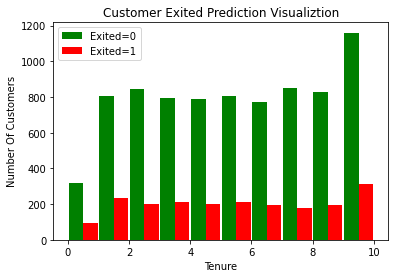

In [10]:
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([tenure_exited_no, tenure_exited_yes], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.legend()

## Plot correlation between Balance and Exited

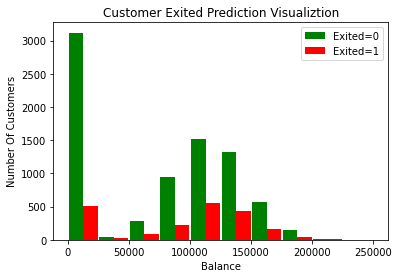

In [11]:
tenure_exited_no = df[df.Exited == 0].Balance
tenure_exited_yes = df[df.Exited == 1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([tenure_exited_no, tenure_exited_yes], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.legend()

In [12]:
len(df[(df.Exited == 0) & (df.Balance == 0)]) / len(df) * 100

31.169999999999998

Note: There is a high number of customers (31%) have a balance of 0 but didn't exit.

## Replace Female and Male in the Gender column with 0 and 1

In [13]:
df.Gender.replace({'Female':1, 'Male':0}, inplace=True)

## One hot encoding the Geography column

In [14]:
df_with_dummies = pd.get_dummies(data=df, columns=['Geography'])
df_with_dummies.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5542,682,1,35,2,181166.44,1,1,1,63737.19,1,1,0,0
169,682,0,24,9,57929.81,2,0,0,53134.30,0,0,1,0
7406,489,0,58,4,0.00,2,1,1,191419.32,0,0,0,1


## Scale CreditScore, Age, Balance, EstimatedSalary between 0 and 1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_with_dummies_and_scaled = df_with_dummies
df_with_dummies_and_scaled[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df_with_dummies[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

df_with_dummies_and_scaled.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1877,0.840,0,0.500000,9,0.251606,2,1,0,0.926087,1,0,0,1
6985,0.950,0,0.189189,9,0.000000,2,0,0,0.048702,0,1,0,0
8343,0.998,1,0.418919,9,0.529836,1,1,0,0.855307,1,0,1,0


## Split data in traing and test data

In [16]:
final_df = df_with_dummies_and_scaled

X = final_df.drop('Exited',axis='columns')
y = final_df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [17]:
x_train.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
1192,0.870,1,0.581081,4,0.517564,2,1,0,0.851097,0,0,1
1639,0.308,0,0.189189,8,0.678727,2,0,1,0.078245,0,1,0
8708,0.856,1,0.405405,3,0.407698,2,1,0,0.913486,0,1,0


In [18]:
len(x_train)

8000

In [19]:
len(x_test)

2000

In [20]:
y_train

7751    0
4154    0
3881    0
9238    0
5210    0
       ..
3046    1
9917    1
4079    0
2254    0
2915    1
Name: Exited, Length: 8000, dtype: int64

## Build the model in tensorflow

In [21]:
len(x_train.columns)

12

In [22]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

2022-04-11 16:13:05.185987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-11 16:13:05.186008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/100


2022-04-11 16:13:07.290099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-11 16:13:07.290175: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-11 16:13:07.290212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thinkpad): /proc/driver/nvidia/version does not exist
2022-04-11 16:13:07.290765: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


250/250 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7956
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7969
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8014
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8045
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8109
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8141
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8183
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8248
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8245
E

In [23]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8520


[0.3593084514141083, 0.8519999980926514]

In [24]:
y_pred = []
for element in model.predict(x_test):
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

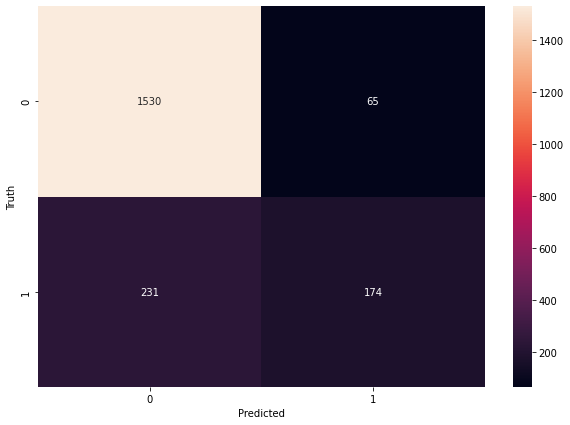

In [26]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')